![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [62]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import sklearn logistic regression
from sklearn.linear_model import LogisticRegression
# import sklearn k-nearst neighbors
from sklearn.neighbors import KNeighborsClassifier
# import sklearn support vector machine
from sklearn.svm import SVC
# import sklearn naive bayes
from sklearn.naive_bayes import GaussianNB
# import sklearn decision tree
from sklearn.tree import DecisionTreeClassifier
# import sklearn random forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.shape

(10000, 14)

In [4]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [33]:
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
# separate categorical and numerical churn
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard',  'IsActiveMember']
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

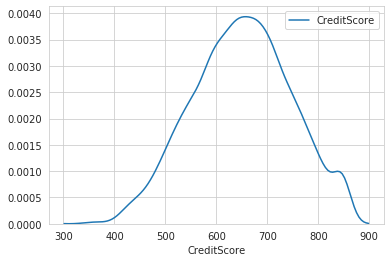

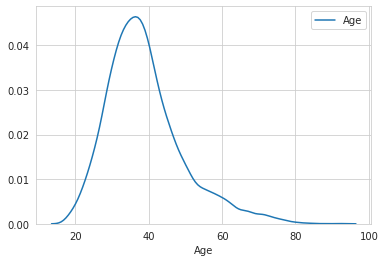

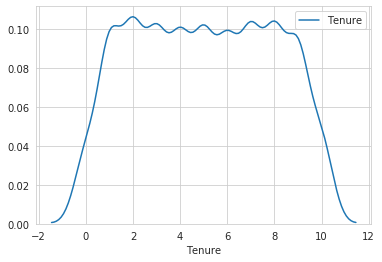

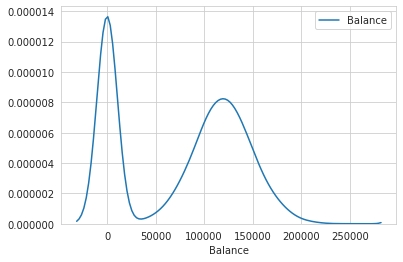

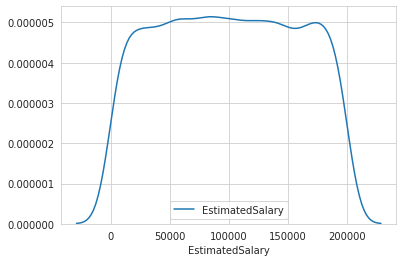

In [25]:

sns.set_style('whitegrid')
# plot one histogram for each numerical feature
for feature in features:
    sns.distplot(churn[feature], hist=False, label=feature)
    plt.show()




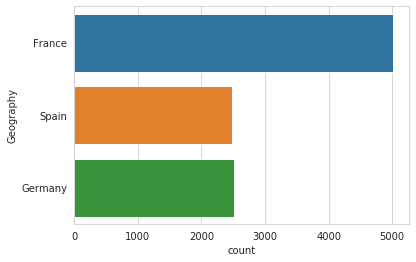

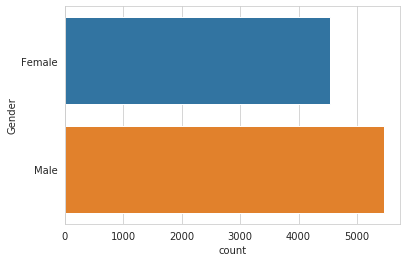

In [30]:
for col in churn.select_dtypes(include='object'):
    if churn[col].nunique() <= 22:
        sns.countplot(y=col, churn=churn)
        plt.show()

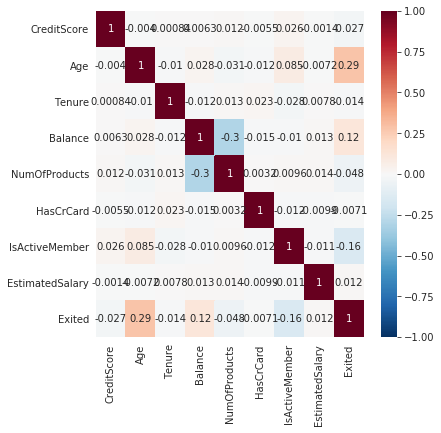

In [41]:
# correlation matrix
corr = churn.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

### 3.4 Construção do modelo

In [42]:
# separe os dados em treino e teste
train_set, test_set = train_test_split(churn, test_size=0.2, random_state=1)


In [55]:
features = train_set.drop(['Exited', 'Geography', 'Gender'], axis=1).columns.tolist()

# add all models imported above
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# create a list of model names
model_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Support Vector Machine',
    'Naive Bayes',
    'Decision Tree',
    'Random Forest'
]

# create a dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Score'])

# loop through the models
for model, name in zip(models, model_names):
    # train the model
    model.fit(train_set[features], train_set['Exited'])
    # make predictions
    predictions = model.predict(test_set[features])
    # calculate the score
    score = model.score(test_set[features], test_set['Exited'])
    # store the results
    results = results.append({'Model': name, 'Score': score}, ignore_index=True)

results

,Model,Score
0,Logistic Regression,0.7855
1,K-Nearest Neighbors,0.7640
2,Support Vector Machine,0.7925
3,Naive Bayes,0.7825
4,Decision Tree,0.7830
5,Random Forest,0.8540


### 3.4 Otimização do modelo

In [57]:
# hyperparameter tuning for random forest:
#import k-fold cross validation
from sklearn.model_selection import KFold
#import grid search
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(model, param_grid, X_train, y_train):
    # create a cross-validation object
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # create a grid search object
    grid = GridSearchCV(model, param_grid, cv=cv)
    # fit the grid search object to the training data
    grid.fit(X_train, y_train)
    # return the grid search object
    return grid

grid = hyperparameter_tuning(RandomForestClassifier(), {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [2, 5, 10, 20, 50, 100]}, train_set[features], train_set['Exited'])

In [61]:
# get the best estimator
best_model = grid.best_estimator_

# print score of the best model
print('The best random forest model got the score:',best_model.score(test_set[features], test_set['Exited']))


The best random forest model got the score: 0.858


## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.